In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount= True)

Mounted at /content/drive


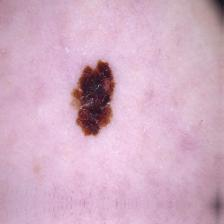

In [ ]:
from IPython.display import Image
Image('/content/drive/MyDrive/SkinCancerDataset/DermMel/DermMel/test/Melanoma/AUG_0_1001.jpeg')

In [ ]:
from tensorflow.keras.layers import Dense, Lambda, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications import ResNet101V2
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from glob import glob
import cv2
import os

In [ ]:
train=ImageDataGenerator(rescale=1/255)
test=ImageDataGenerator(rescale=1/255)

In [ ]:
cv2.imread("/content/drive/MyDrive/SkinCancerDataset/DermMel/DermMel/test/Melanoma/AUG_0_1001.jpeg").shape

(224, 224, 3)

In [ ]:
train_dataset=train.flow_from_directory("/content/drive/MyDrive/SkinCancerDataset/DermMel/DermMel/train_sep",
                                       target_size=(224,224),
                                       batch_size=20,
                                        class_mode='binary')
valid_dataset=train.flow_from_directory("/content/drive/MyDrive/SkinCancerDataset/DermMel/DermMel/valid",
                                       target_size=(224,224),
                                       batch_size=20,
                                        class_mode='binary')
test_dataset=train.flow_from_directory("/content/drive/MyDrive/SkinCancerDataset/DermMel/DermMel/test",
                                       target_size=(224,224),
                                       batch_size=20,
                                        class_mode='binary')

Found 10682 images belonging to 2 classes.
Found 3562 images belonging to 2 classes.
Found 3561 images belonging to 2 classes.


In [ ]:
rn101v2= ResNet101V2(include_top=False,
    weights="imagenet",
    input_shape=(224, 224, 3),
    pooling='max',
    )

for layer in rn101v2.layers:
  layer.trainable= False

model= Sequential()
model.add(rn101v2)
model.add(Flatten())
model.add(Dense(800, activation= 'relu'))
model.add(Dense(120, activation= 'relu'))
model.add(Dense(84, activation= 'relu'))
model.add(Dense(1, activation= 'sigmoid'))

model.summary()

171319296/171317808 [==============================] - 1s 0us/step
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet101v2 (Functional)     (None, 2048)              42626560  
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 800)               1639200   
_________________________________________________________________
dense_1 (Dense)              (None, 120)               96120     
_________________________________________________________________
dense_2 (Dense)              (None, 84)                10164     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 85        
Total params: 44,372,129
Trainable params: 1,745,569
No

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer= 'adam',
              metrics=['accuracy', 'mae', 'mape'])

In [ ]:
model_fit = model.fit(train_dataset,
                    batch_size=32,
                    epochs=60,
                    verbose=1,  
                    validation_data=valid_dataset)

Epoch 1/60
535/535 [==============================] - 4868s 9s/step - loss: 0.6816 - accuracy: 0.7830 - mae: 0.2691 - mape: 135559853.7892 - val_loss: 0.3541 - val_accuracy: 0.8495 - val_mae: 0.1812 - val_mape: 148295328.0000
Epoch 2/60
535/535 [==============================] - 118s 221ms/step - loss: 0.2612 - accuracy: 0.8898 - mae: 0.1531 - mape: 76571987.7313 - val_loss: 0.2326 - val_accuracy: 0.9009 - val_mae: 0.1482 - val_mape: 68405928.0000
Epoch 3/60
535/535 [==============================] - 117s 219ms/step - loss: 0.2314 - accuracy: 0.9021 - mae: 0.1397 - mape: 69983414.3060 - val_loss: 0.2404 - val_accuracy: 0.8998 - val_mae: 0.1296 - val_mape: 56981688.0000
Epoch 4/60
535/535 [==============================] - 117s 218ms/step - loss: 0.2008 - accuracy: 0.9159 - mae: 0.1189 - mape: 58665793.3060 - val_loss: 0.2301 - val_accuracy: 0.9065 - val_mae: 0.1301 - val_mape: 52052576.0000
Epoch 5/60
535/535 [==============================] - 117s 218ms/step - loss: 0.1764 - accuracy:

In [ ]:
model.save('RN101V2.h5')

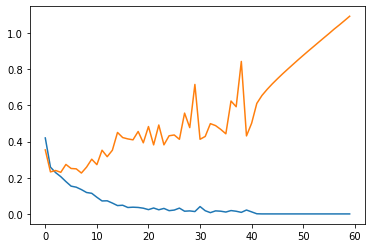

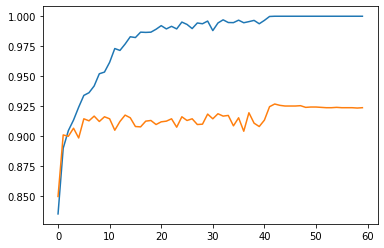

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(model_fit.history['loss'], label= 'train loss')
plt.plot(model_fit.history['val_loss'], label= 'val loss')
plt.legend
plt.show()
plt.savefig('lossVal_loss')

plt.plot(model_fit.history['accuracy'], label= 'train acc')
plt.plot(model_fit.history['val_accuracy'], label= 'val acc')
plt.legend
plt.show()
plt.savefig('AccVal_acc')